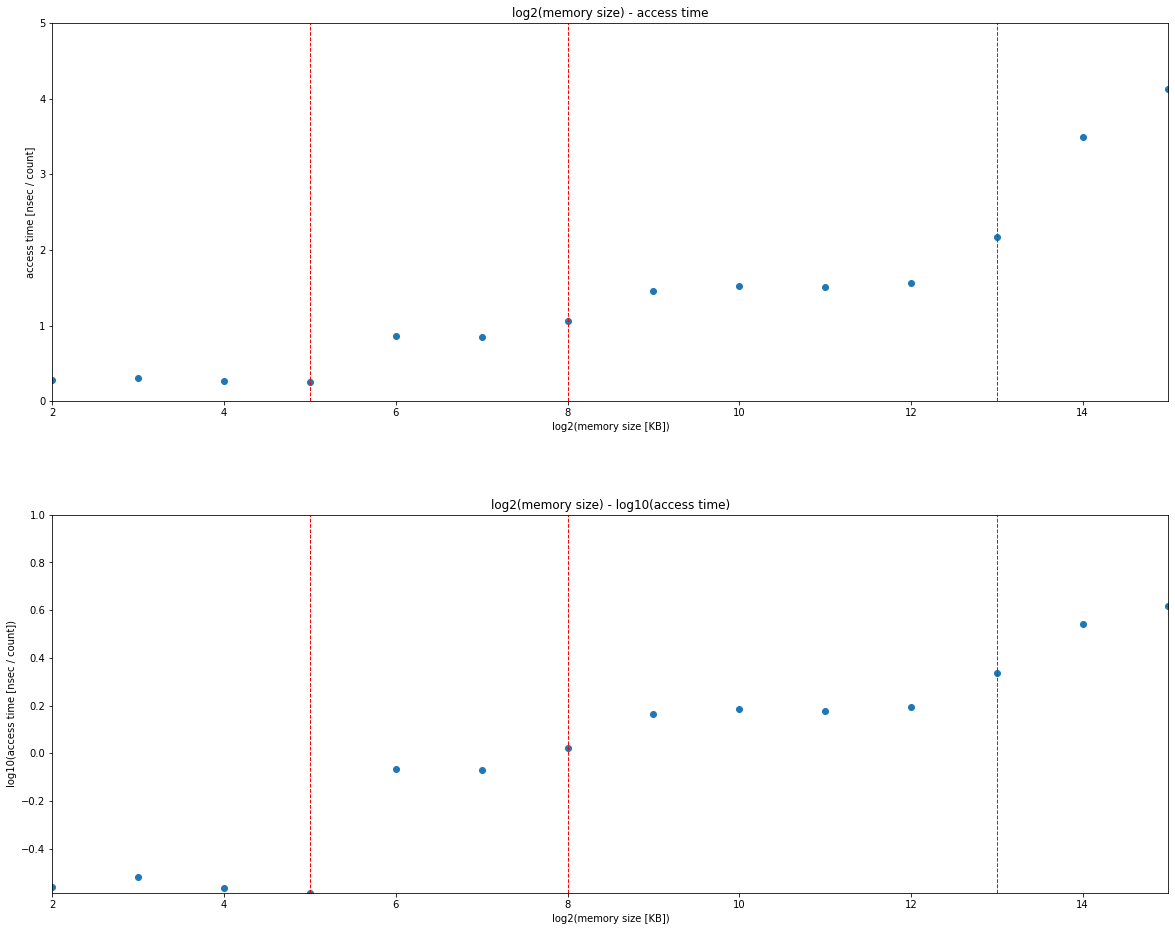

In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

filename = 'cache.txt'

LABEL_MEMSIZE = 'memory size [B]'
LABEL_ACCESS_TIME = 'access time [nsec / count]'

df = pd.read_table(filename, sep = ' ', header = None, names = (LABEL_MEMSIZE, LABEL_ACCESS_TIME))

x = np.log2(df[LABEL_MEMSIZE] / 1024)
y = df[LABEL_ACCESS_TIME]

plt.figure(figsize=[20, 16])

plt.subplot(2, 1, 1)
plt.scatter(x, y)
plt.title('log2(memory size) - access time')
plt.xlabel('log2(memory size [KB])')
plt.ylabel(LABEL_ACCESS_TIME)

x_min, x_max = np.min(x), np.max(x)
y_min, y_max = np.min(y), np.max(y)
y_grand, y_limit = 0, math.ceil(y_max)
plt.xlim(x_min, x_max)
plt.ylim(0, y_limit)

# The sizes of CPU caches are 32KB, 256KB, 8192KB. The access times probabry increase at these values.
#
# $ for d in $(ls -d /sys/devices/system/cpu/cpu0/cache/index*); do
#     echo -n 'level: '; cat ${d}/level | tr -d '\n'; echo -n ', ';
#     echo -n 'type: '; cat ${d}/type | tr -d '\n'; echo -n ', ';
#     echo -n 'size: '; cat ${d}/size | tr -d '\n'; echo
#   done
# level: 1, type: Data, size: 32K
# level: 1, type: Instruction, size: 32K
# level: 2, type: Unified, size: 256K
# level: 3, type: Unified, size: 8192K
for s in [32, 256, 8192]:
    plt.vlines(math.log2(s), y_grand, y_limit, color = "red", linestyle = 'dashed', linewidth = 1)

y = np.log10(df[LABEL_ACCESS_TIME])
plt.subplot(2, 1, 2)
plt.scatter(x, y)
plt.title('log2(memory size) - log10(access time)')
plt.xlabel('log2(memory size [KB])')
plt.ylabel('log10(access time [nsec / count])')
x_min, x_max = np.min(x), np.max(x)
y_min, y_max = np.min(y), np.max(y)
y_grand, y_limit = y_min, math.ceil(y_max)
plt.xlim(x_min, x_max)
plt.ylim(y_grand, y_limit)
for s in [32, 256, 8192]:
    plt.vlines(math.log2(s), y_grand, y_limit, color = "red", linestyle = 'dashed', linewidth = 1)

plt.subplots_adjust(hspace=0.3)
plt.show()